# 1) Importar librerias

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 2) Leer dataset y verificar si tiene datos vacios

In [4]:
df = pd.read_csv('mergeVincesnoAtipicos.csv', sep=';', low_memory=False)
df.isnull().sum()

Index                    0
_1                       0
Identificador            0
year                     0
rc_clacul                0
ct_prepa_suelo           0
ct_k510ha                0
ct_k511ha                0
ct_afecta_prod           0
ct_riego                 0
ct_superf_regada_ha      0
Tipo_riego               0
ct_fqui                  0
ct_fqui_npk              0
ct_fqui_nit              0
ct_fqui_fos              0
ct_fqui_pot              0
su_fertilizada           0
ct_pqui                  0
pq_herb                  0
ct_color_her_pq          0
pq_ins                   0
ct_color_ins_pq          0
pq_fun                   0
ct_color_fun_pq          0
su_plaguicidas           0
ct_prod                  0
Ventas                   0
Unnamed: 28            479
dtype: int64

In [5]:
df

,Index,_1,Identificador,year,rc_clacul,ct_prepa_suelo,ct_k510ha,ct_k511ha,ct_afecta_prod,ct_riego,...,pq_herb,ct_color_her_pq,pq_ins,ct_color_ins_pq,pq_fun,ct_color_fun_pq,su_plaguicidas,ct_prod,Ventas,Unnamed: 28
0,168,12678,12085002062560003,2018,507,1,0.0706,0.0706,2,1,...,0.5,4,0.5,1,0.5,4,0.0706,0.272727,0.181818,NaN
1,172,12683,12085002062560004,2018,507,1,0.5000,0.5000,2,1,...,1.0,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN
2,171,12682,12085002062560004,2018,507,1,0.5000,0.5000,2,1,...,1.0,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN
3,170,12681,12085002062560004,2018,507,1,0.5000,0.5000,2,2,...,1.0,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN
4,169,12680,12085002062560004,2018,507,1,0.5000,0.5000,3,2,...,1.0,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,163,16815,12085151000993398,2017,507,2,4.9392,4.9392,7,2,...,7.0,3,2.0,4,0.0,0,4.9392,16.838182,16.838182,NaN
475,162,16813,12085151000993398,2017,507,2,9.8784,9.8784,7,2,...,14.0,3,4.0,3,0.0,0,9.8784,33.676364,33.676364,NaN
476,167,16821,12085152000990314,2017,507,1,5.0000,5.0000,7,1,...,0.0,0,2.0,1,9.0,1,5.0000,11.697955,11.697955,NaN
477,166,16820,12085152000990314,2017,507,1,5.0000,5.0000,7,1,...,0.0,0,2.0,1,9.0,1,5.0000,11.697955,11.697955,NaN


# 3) Poner que columnas se utilizaran en la regresion

In [6]:
columnas_regresion = ['ct_prepa_suelo', 'ct_k510ha', 'ct_k511ha', 'ct_afecta_prod',
                       'ct_riego', 'su_fertilizada', 'ct_fqui', 'ct_fqui_npk',
                       'ct_pqui', 'su_plaguicidas','ct_prod'] #Ventas / ct_prod en base a lo que se necesite

# 4) Variable Independiente X y varia Dependiente Y ,luego dividir el datset en training y testing

In [7]:
X = df[columnas_regresion]
y = df['Ventas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 5) Elegir el Modelo en este caso Regresion Lineal

In [8]:
model = LinearRegression()

# 6) Para realizar el Gridcv vamos a pasarle el modelo y los parametros

In [9]:
parameters = dict()
parameters['fit_intercept'] = [True, False]
parameters['copy_X'] = [True, False]
parameters['positive'] = [True, False]

grid_search = GridSearchCV(model, parameters, cv=15, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_score = grid_search.best_score_
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

regression_best = LinearRegression(**best_params)
rl = regression_best.fit(X_train, y_train) #MODELO ENTRENADO CON HIPER PARAMETROS
y_pred = regression_best.predict(X_test)
scores = cross_val_score(best_model, X, y, cv=15)

# 7) Hacemos un print de los parametros que arrojo el Cross Validation

In [10]:
print("Mejores hiperparámetros:", best_params)
print("Coeficientes:", best_model.coef_)
print("Intercepto:", best_model.intercept_)
print("Mejor Score:", best_score)
print("Puntajes de validación cruzada:", scores)
print("Puntaje promedio de validación cruzada:", scores.mean())
print("Resultados de la búsqueda de hiperparámetros:")
print(results[['params', 'mean_test_score']]) 

Mejores hiperparámetros: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Coeficientes: [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.39052556e-01
 0.00000000e+00 0.00000000e+00 1.01926074e-01 1.80702255e-04
 0.00000000e+00 1.45043603e-01 8.50349223e-01]
Intercepto: -0.8829221916925709
Mejor Score: 0.9039053313145932
Puntajes de validación cruzada: [0.90721543 0.36239795 0.9762902  0.93335712 0.89849721 0.98104842
 0.9557443  0.31977988 0.91953557 0.94935767 0.83019267 0.90942838
 0.96962473 0.94140106 0.97536773]
Puntaje promedio de validación cruzada: 0.8552825552990928


In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results = pd.DataFrame(grid_search.cv_results_)
print("Coefficient of Determination (R^2):", r2)

Mean Absolute Error: 0.8777439727147586
Mean Squared Error: 1.7137428311290341
Root Mean Squared Error: 1.3091000080700612
Mean Squared Error (MSE): 1.7137428311290341
Coefficient of Determination (R^2): 0.9566584749471506
Best Score: 0.9039053313145932
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Resultados de la búsqueda de hiperparámetros:
                                              params  mean_test_score
0  {'copy_X': True, 'fit_intercept': True, 'posit...         0.903905
1  {'copy_X': True, 'fit_intercept': True, 'posit...         0.900090
2  {'copy_X': True, 'fit_intercept': False, 'posi...         0.899559
3  {'copy_X': True, 'fit_intercept': False, 'posi...         0.900183
4  {'copy_X': False, 'fit_intercept': True, 'posi...         0.903905
5  {'copy_X': False, 'fit_intercept': True, 'posi...         0.900090
6  {'copy_X': False, 'fit_intercept': False, 'pos...         0.899559
7  {'copy_X': False, 'fit_intercept': False, 'pos...         0.90

# 8) Mostramos una tabla de la prediccion versus el valor actual

In [15]:
#Esta tabla muestra el valor de produccion del dataset vs el valor que el modelo predijo cuando se le pasaron los otros parametros del dataset
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

,Actual,Predicted
15,7.272727,6.510704
124,3.780000,3.349052
141,3.800000,3.262188
263,1.909091,1.673521
170,22.622727,20.387131
...,...,...
415,17.800000,16.231410
416,1.000000,1.846458
107,1.136364,1.199333
461,1.500000,1.364388


# 9) Graficamos los resultados

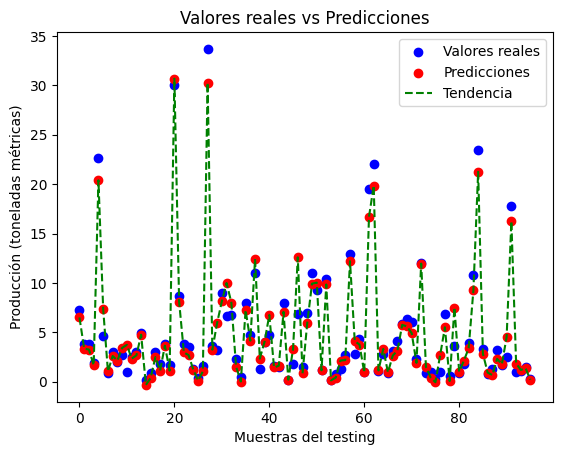

96


In [16]:
import matplotlib.pyplot as plt

# Graficar las predicciones vs los valores reales
plt.scatter(range(len(y_test)), y_test, c='blue', label='Valores reales')
plt.scatter(range(len(y_pred)), y_pred, c='red', label='Predicciones')
plt.xlabel('Muestras del testing')
plt.ylabel('Producción (toneladas métricas)')
plt.title('Valores reales vs Predicciones')
plt.legend()
plt.show()
print(len(y_pred))
